# Project Code-PRCP-1024- Texas Salary Prediction

# BUSINESS CASE :-
## Create a predictive model which will help theTexas state government  team to know the payroll information of employees of the state of Texas.

# 1. Python Implementation

In [1]:
# import Basic Libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Salary.csv")
df

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,2899.00,34788.00,770781,NaN,NaN,NaN,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,5500.00,66000.00,847431,NaN,NaN,NaN,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,...,12.93000,20.0,1120.60,13447.20,34266,NaN,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN


# 2. Domain Analysis and Basic Checks
##### 1.Agency:- code(ID) of the state agency.
##### 2.Agency Name:- Full name of the state agency.
##### 3.Last Name:- Employee’s last name.
##### 4.First Name:- Employee’s first name.
##### 5.MI	Text:- Middle initial of the employee.
##### 6.Class title:- Job title or position.
##### 7.Ethnicity:- Ethnic background of employee (used for DEI analysis).
##### 8.Gender:- Employee gender.
##### 9.Status:- Likely employment type (e.g., full-time, part-time).
##### 10.Employ Date:- Date the employee started with the state. Used for experience calculation.
##### 11.Hourly Rate:- Wage per hour (if hourly).
##### 12.Hrs per week:- Scheduled hours worked weekly.
##### 13.Monthly:- Monthly salary (used as main target or feature).
##### 14.Annual:- Annual salary (derived or primary target for prediction).
##### 15.State Number:- Likely an internal employee/state ID or unique identifier.

In [5]:
df.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


In [7]:
df.tail()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00,40.0,2899.00,34788.00,770781,NaN,NaN,NaN,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00,40.0,5500.00,66000.00,847431,NaN,NaN,NaN,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,...,12.93,20.0,1120.60,13447.20,34266,NaN,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN
149480,809,STATE PRESERVATION BOARD ...,ZUNKER,GEORGIA,P,130,CUSTOMER SERVICE REP I ...,WHITE,FEMALE,CRP - CLASSIFIED REGULAR PART-TIME,...,11.74,20.0,1017.46,12209.52,103583,NaN,NaN,NaN,NaN,NaN


In [9]:
df.describe()

,AGENCY,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,multiple_full_time_jobs,summed_annual_salary
count,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,1.494810e+05,14.0,16.000000
mean,545.736288,0.346488,39.714918,4226.184248,50714.210973,5.651930e+05,1.0,74303.955000
std,139.057691,4.211485,2.323855,2093.111691,25117.340292,4.786212e+05,0.0,51925.944282
min,101.000000,0.000000,1.000000,50.000000,600.000000,1.000000e+00,1.0,18000.000000
25%,529.000000,0.000000,40.000000,3019.840000,36238.080000,1.133340e+05,1.0,32962.500000
50%,530.000000,0.000000,40.000000,3720.170000,44642.040000,3.463730e+05,1.0,48063.300000
75%,696.000000,0.000000,40.000000,4865.810000,58389.720000,1.100500e+06,1.0,123751.770000
max,930.000000,117.788480,70.000000,46125.000000,553500.000000,1.271604e+06,1.0,171383.400000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS CODE               149481 non-null  object 
 6   CLASS TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY DATE              149481 non-null  object 
 11  HRLY RATE                149481 non-null  float64
 12  HRS PER WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

In [13]:
df.dtypes

AGENCY                       int64
AGENCY NAME                 object
LAST NAME                   object
FIRST NAME                  object
MI                          object
CLASS CODE                  object
CLASS TITLE                 object
ETHNICITY                   object
GENDER                      object
STATUS                      object
EMPLOY DATE                 object
HRLY RATE                  float64
HRS PER WK                 float64
MONTHLY                    float64
ANNUAL                     float64
STATE NUMBER                 int64
duplicated                  object
multiple_full_time_jobs    float64
combined_multiple_jobs      object
summed_annual_salary       float64
hide_from_search            object
dtype: object

In [15]:
df.columns

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

In [17]:
df.shape

(149481, 21)

In [19]:
df.describe(include='O')

,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,duplicated,combined_multiple_jobs,hide_from_search
count,149481,149481,149481,149481,149481,149481,149481,149481,149481,149481,143,97,16
unique,113,38675,23559,27,1481,1422,6,2,11,6295,1,1,1
top,HEALTH AND HUMAN SERVICES COMMISSION ...,SMITH,MICHAEL,,4504,CORREC OFFICER IV ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,09-01-2017,True,True,True
freq,36667,1243,1843,38408,9267,9267,67142,85328,142502,12359,143,97,16


# 3. Exploratory Data Analysis

### Univariate Analysis

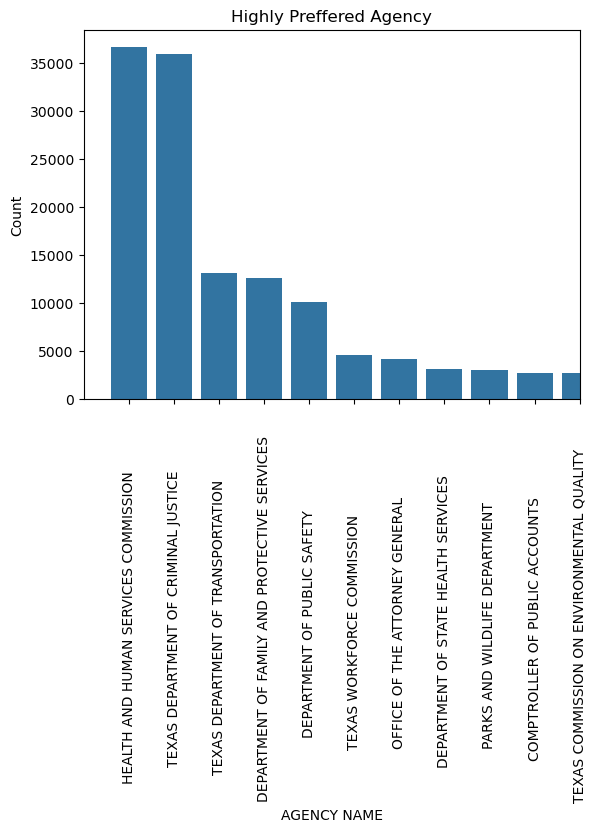

In [21]:
sns.countplot(x = 'AGENCY NAME', data = df, order = df['AGENCY NAME'].value_counts().index)
plt.title('Highly Preffered Agency', fontsize = 12, color = 'black')
plt.xlabel('AGENCY NAME', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.xticks(rotation = 90)
plt.xlim(-1, 10)
plt.show()

**INSIGHTS**

- HEALTH AND HUMAN SERVICE COMMISSION is the mosst preffered Agency.
- TEXASS COMMISSION ON ENVIRONMENTAL QUALITY is the least preffered Agency.

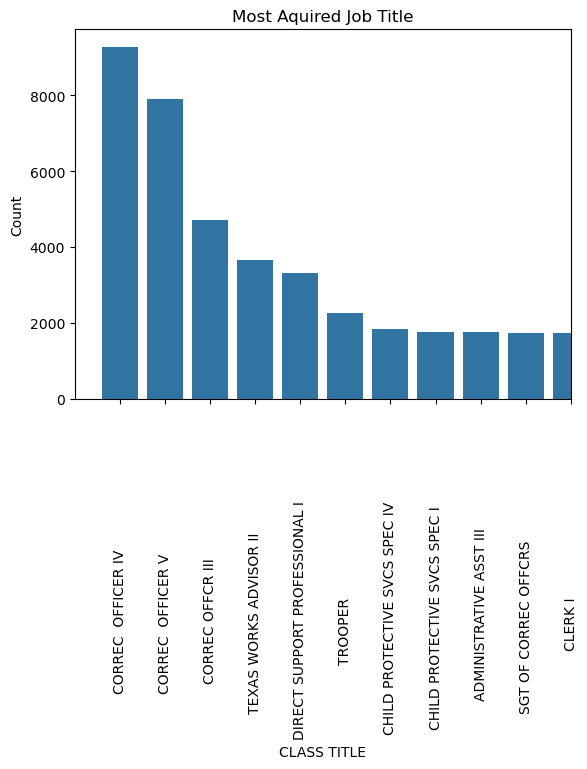

In [23]:
sns.countplot(x = 'CLASS TITLE', data = df, order = df['CLASS TITLE'].value_counts().index)
plt.title('Most Aquired Job Title', fontsize = 12, color = 'black')
plt.xlabel('CLASS TITLE', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.xticks(rotation = 90)
plt.xlim(-1, 10)
plt.show()

**INSIGHTS**

- CORREC OFFICER IV is the most aquired job.
- CLERK I is the least aquired job.

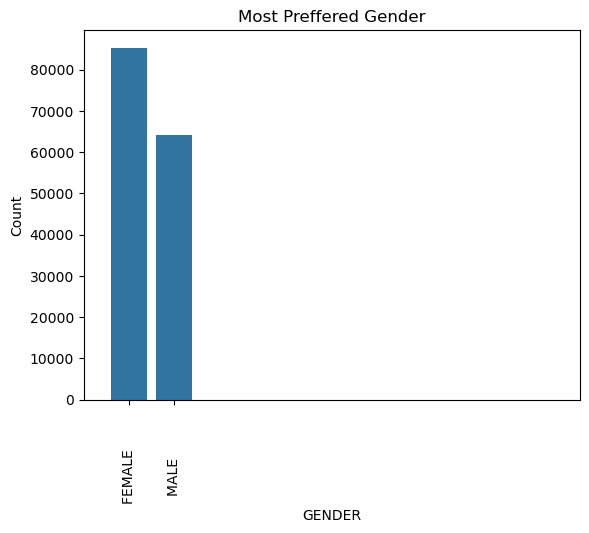

In [25]:
sns.countplot(x = 'GENDER', data = df, order = df['GENDER'].value_counts().index)
plt.title('Most Preffered Gender', fontsize = 12, color = 'black')
plt.xlabel('GENDER', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.xticks(rotation = 90)
plt.xlim(-1, 10)
plt.show()

**INSIGHTS**
- Females are preffered more than the Males for most of the jobs.

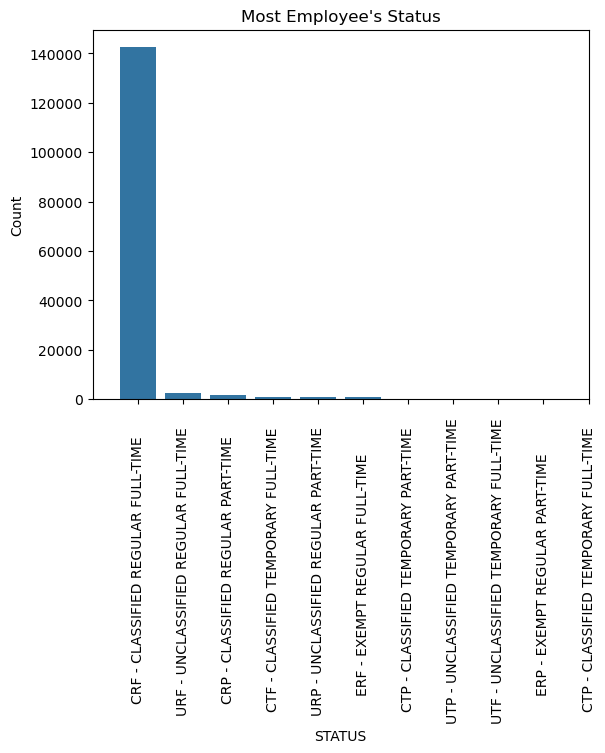

In [27]:
sns.countplot(x = 'STATUS', data = df, order = df['STATUS'].value_counts().index)
plt.title("Most Employee's Status", fontsize = 12, color = 'black')
plt.xlabel('STATUS', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.xticks(rotation = 90)
plt.xlim(-1, 10)
plt.show()

**INSIGHTS**

- CLASSIFIED REGULAR FULL-TIME is the most of the employee's status.
- CLASSIFIED TEMPORARY FULL-TIME is the least of the employee's status.

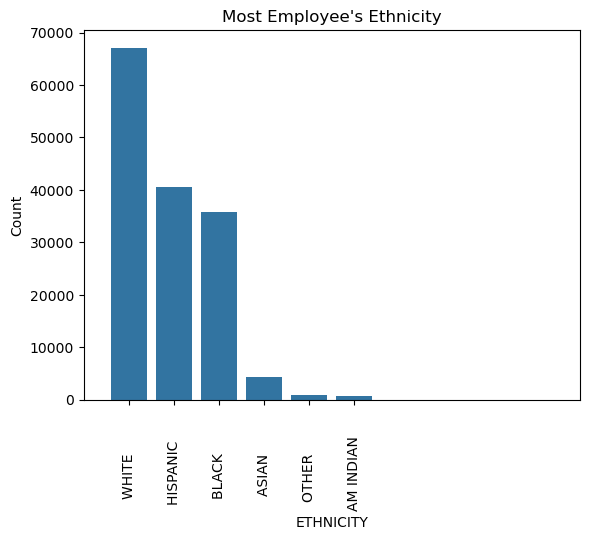

In [29]:
sns.countplot(x = 'ETHNICITY', data = df, order = df['ETHNICITY'].value_counts().index)
plt.title("Most Employee's Ethnicity", fontsize = 12, color = 'black')
plt.xlabel('ETHNICITY', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.xticks(rotation = 90)
plt.xlim(-1, 10)
plt.show()

**INSIGHTS**

- Most of the employee's ethnicity is WHITE.
- INDIANS are the least preffered.

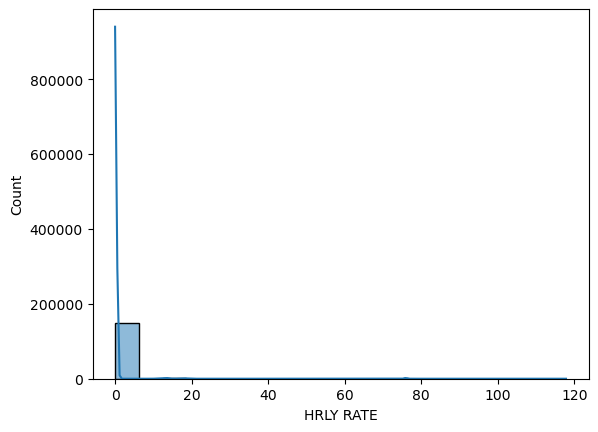

In [31]:
#Numerical Category
sns.histplot(data=df['HRLY RATE'],kde=True)
plt.show()

**INSIGHTS**

* The values are almost nearly to 0.

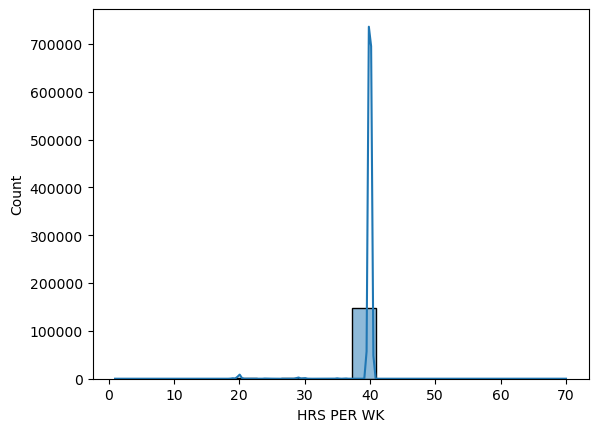

In [33]:
sns.histplot(data=df['HRS PER WK'],kde=True)
plt.show()

**INSIGHTS**

* Most of the data is centered sharply around 40 hours per week, which is standard full time working hours.
* The frequency is extremely high around 40 hours, suggesting that the majority of the individuals in the data set work exactly 40 hours per week.

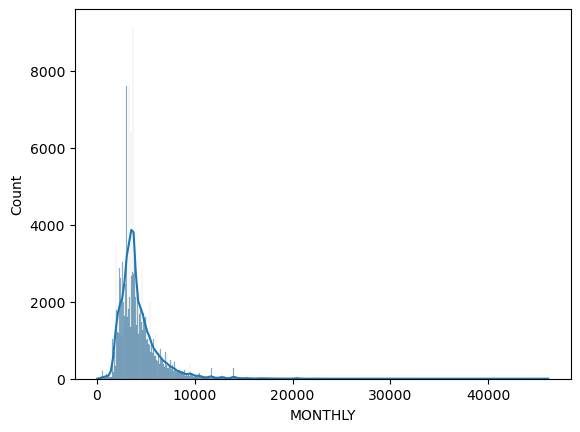

In [35]:
sns.histplot(x=df.MONTHLY,kde=True)
plt.show()

**INSIGHTS**

* Monthly Salary is less than 10,000 dollars for most of the people in the given data set.

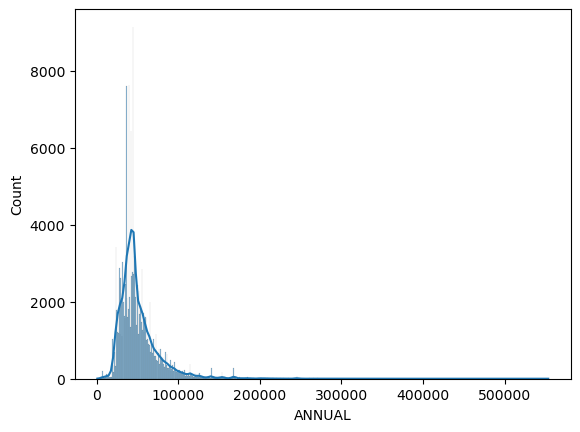

In [37]:
sns.histplot(x=df.ANNUAL,kde=True)
plt.show()

**INSIGHTS**

* The annual income of most of the people in the given data set is less than 1,00,000 dollars.

### Bivariate Analysis

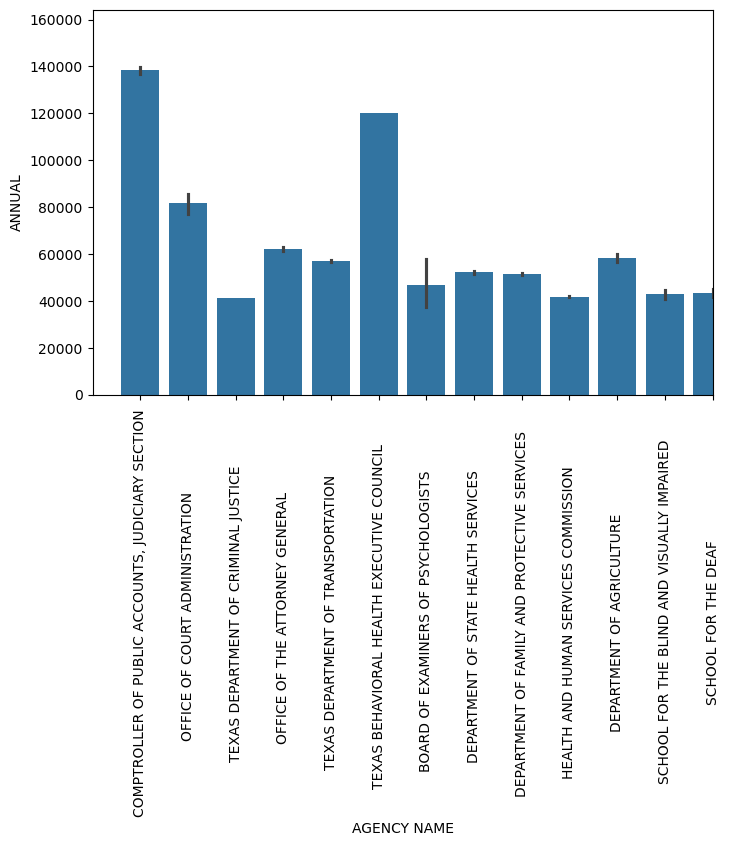

In [39]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df['AGENCY NAME'], y=df['ANNUAL'], data=df)
plt.xticks(rotation = 90)
plt.xlim(-1,12)
plt.show()

**INSIGHTS**
* There is a clear difference in average annual salary across different agencies.
* One or two agencies have significantly higher averasge salaries compared to others.

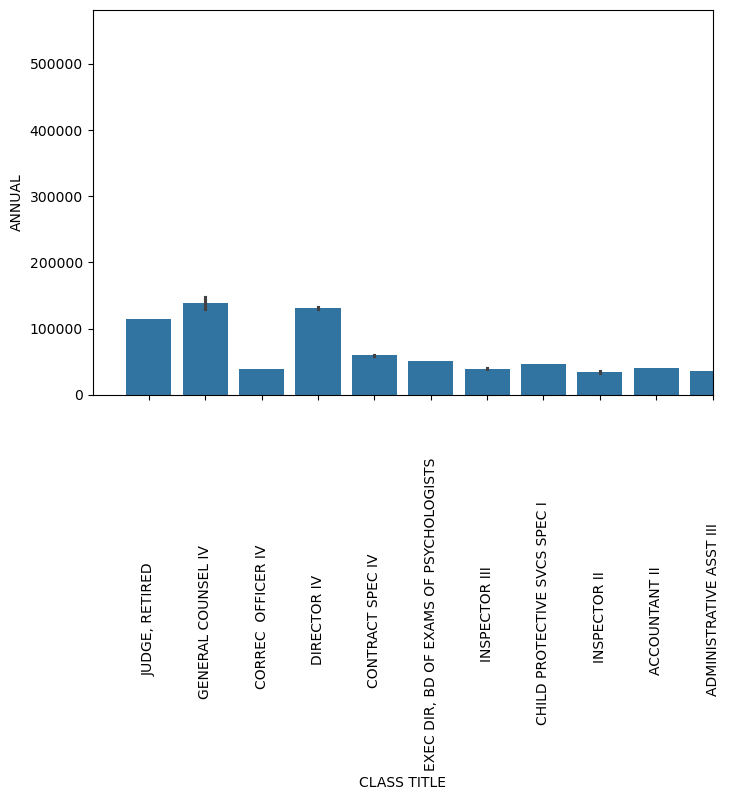

In [42]:
plt.figure(figsize=(8,5))
sns.barplot(x='CLASS TITLE', y='ANNUAL', data=df)
plt.xticks(rotation=90)
plt.xlim(-1,10)
plt.show()

**INSIGHTS**
* There is a steep drop in salary after the first few rols, showing high variation in pay across job classes.
* Many job classes have salaries clustered around the lower end (below 1,00,000).

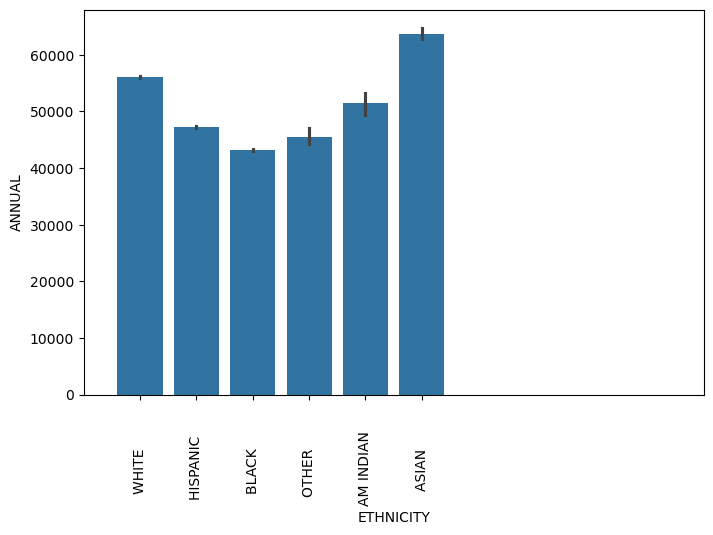

In [45]:
plt.figure(figsize=(8,5))
sns.barplot(x='ETHNICITY', y='ANNUAL', data=df)
plt.xticks(rotation=90)
plt.xlim(-1,10)
plt.show()

**INSIGHTS**
* Asian individuals have the highest average salary.
* Black individuals show lower average salary.
* Other groups fall in the mid-range
* There is a clear gap of nearly 20,000 between the highest and lowest groups.

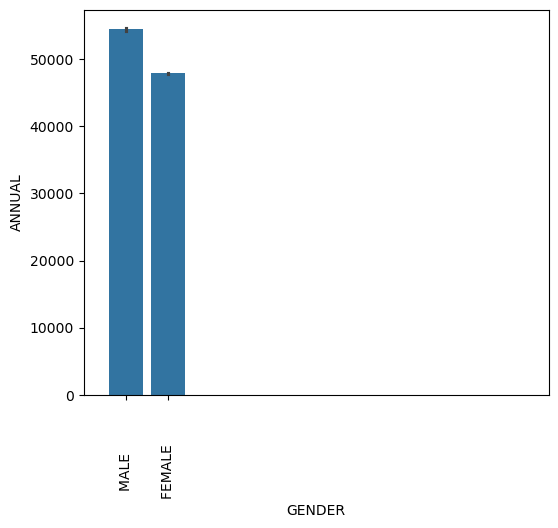

In [48]:
plt.figure(figsize=(6,5))
sns.barplot(x='GENDER', y='ANNUAL', data=df)
plt.xticks(rotation=90)
plt.xlim(-1,10)
plt.show()

**INSIGHTS**
* Males have a higher average annual salary compared to females.
* There is an observable gender pay gap.
* Though not extremely large, this gap suggests potential inequality in salary distribution based on gender.

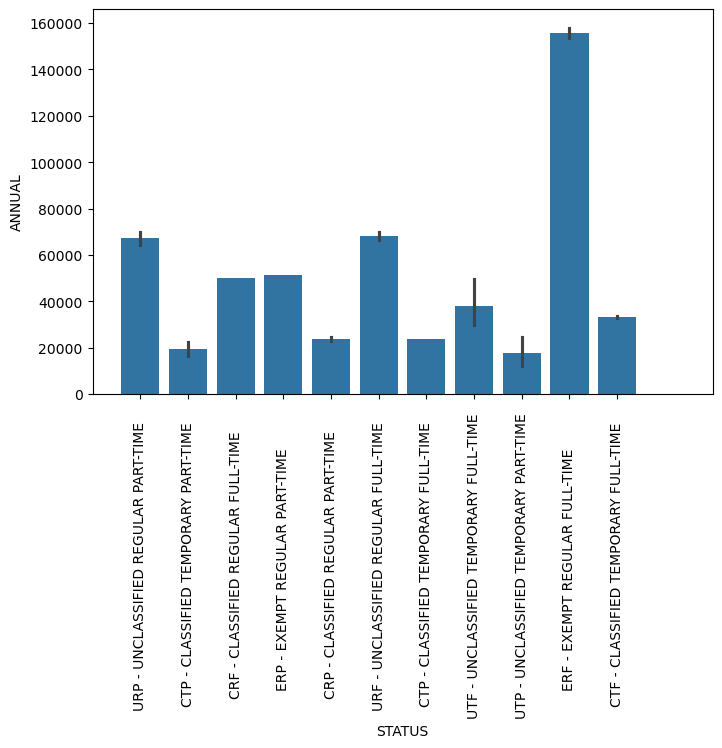

In [51]:
plt.figure(figsize=(8,5))
sns.barplot(x='STATUS', y='ANNUAL', data=df)
plt.xticks(rotation=90)
plt.xlim(-1,12)
plt.show()

**INSIGHTS**
* Exempt regular full-time category has very high average salary.
* Part-time category generally show lower salaries.
* There is a wide range in salary even within the same employment type (especially full-time).

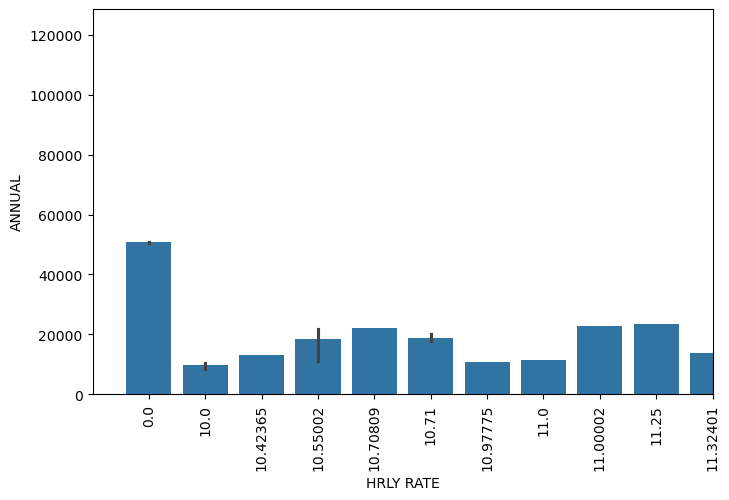

In [54]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['HRLY RATE'], y='ANNUAL', data=df)
plt.xticks(rotation=90)
plt.xlim(-1,10)
plt.show()

**INSIGHTS**
* The bar for hourly rate 0.0 shows the highest annual salary
* This likely represents salaried employees - those who are paid monthly or annually rather than by the hour.
* All other bars represent hourly-paid workers.
* Even with increasing hourly rates, annual salary doesn't consistently increase.

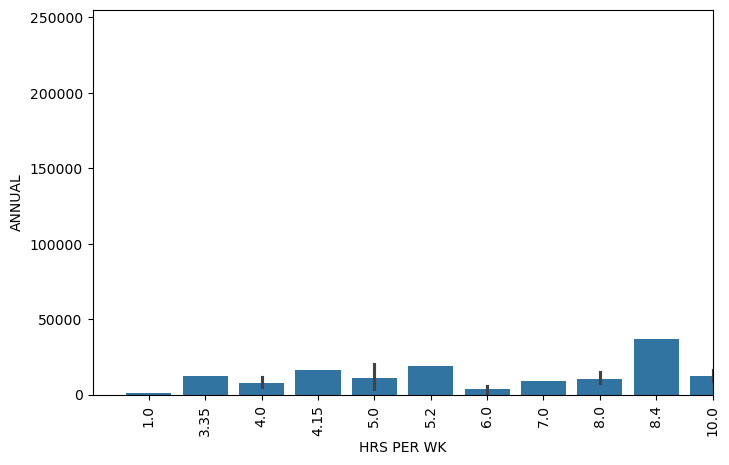

In [57]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['HRS PER WK'], y='ANNUAL', data=df)
plt.xticks(rotation=90)
plt.xlim(-1,10)
plt.show()

**INSIGHTS**
* Annual salaries not increasing when hours per week increases.

# 4. Data Preprocessing

In [5]:
# Checking for missing values
df.isnull().sum()

AGENCY                          0
AGENCY NAME                     0
LAST NAME                       0
FIRST NAME                      0
MI                              0
CLASS CODE                      0
CLASS TITLE                     0
ETHNICITY                       0
GENDER                          0
STATUS                          0
EMPLOY DATE                     0
HRLY RATE                       0
HRS PER WK                      0
MONTHLY                         0
ANNUAL                          0
STATE NUMBER                    0
duplicated                 149338
multiple_full_time_jobs    149467
combined_multiple_jobs     149384
summed_annual_salary       149465
hide_from_search           149465
dtype: int64

In [7]:
# Here for the last five columns almost 99% of data are missing. Keeping it may introduce noise or errors.
# So we dropping these columns
df.drop(['duplicated','multiple_full_time_jobs','combined_multiple_jobs','summed_annual_salary','hide_from_search'],axis=1,inplace=True)

In [9]:
df.isnull().sum()

AGENCY          0
AGENCY NAME     0
LAST NAME       0
FIRST NAME      0
MI              0
CLASS CODE      0
CLASS TITLE     0
ETHNICITY       0
GENDER          0
STATUS          0
EMPLOY DATE     0
HRLY RATE       0
HRS PER WK      0
MONTHLY         0
ANNUAL          0
STATE NUMBER    0
dtype: int64

In [11]:
# Checking for duplicates
df.duplicated().sum()

0

In [ ]:
# There is no duplicates.

In [13]:
# first name,last name and MI columns are non-informative columns. So we are dropping them
df.drop(['FIRST NAME','LAST NAME','MI'],axis=1,inplace=True)

In [ ]:
#Encoding

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   AGENCY        149481 non-null  int64  
 1   AGENCY NAME   149481 non-null  object 
 2   CLASS CODE    149481 non-null  object 
 3   CLASS TITLE   149481 non-null  object 
 4   ETHNICITY     149481 non-null  object 
 5   GENDER        149481 non-null  object 
 6   STATUS        149481 non-null  object 
 7   EMPLOY DATE   149481 non-null  object 
 8   HRLY RATE     149481 non-null  float64
 9   HRS PER WK    149481 non-null  float64
 10  MONTHLY       149481 non-null  float64
 11  ANNUAL        149481 non-null  float64
 12  STATE NUMBER  149481 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 14.8+ MB


In [17]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
categorical_columns=['AGENCY NAME','CLASS CODE','CLASS TITLE','ETHNICITY','GENDER','STATUS']
for column in categorical_columns:
    df[column]=encoder.fit_transform(df[column])

In [19]:
df

,AGENCY,AGENCY NAME,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER
0,241,17,1409,711,5,1,8,02/18/88,75.96150,29.0,9545.82,114549.84,127717
1,212,48,578,560,5,1,4,02-01-2015,81.04454,4.0,1404.77,16857.24,127717
2,241,17,1409,711,5,1,8,02-01-2020,75.96150,29.0,9545.82,114549.84,59115
3,212,48,578,560,5,1,4,09-01-2018,81.04453,4.0,1404.77,16857.24,59115
4,696,88,773,292,3,0,0,06/29/20,0.00000,40.0,3284.27,39411.24,165030
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,76,1021,1198,5,1,0,10/30/17,0.00000,40.0,2899.00,34788.00,770781
149477,809,76,493,1404,5,0,0,07/13/15,0.00000,40.0,5500.00,66000.00,847431
149478,809,76,102,324,5,1,1,10/15/12,12.93000,20.0,1120.60,13447.20,34266
149479,809,76,148,1007,5,1,0,09/22/89,0.00000,40.0,5744.16,68929.92,123490


In [ ]:
# Creating experience column by using employ date column

In [21]:
from datetime import datetime

# Converting the data type of the employ column to date time
df['EMPLOY DATE']=pd.to_datetime(df['EMPLOY DATE'])

# Extract years of experience
df['EXPERIENCE']=datetime.now().year-df['EMPLOY DATE'].dt.year

# Dropping employ date column
df.drop(['EMPLOY DATE'],axis=1,inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   AGENCY        149481 non-null  int64  
 1   AGENCY NAME   149481 non-null  int32  
 2   CLASS CODE    149481 non-null  int32  
 3   CLASS TITLE   149481 non-null  int32  
 4   ETHNICITY     149481 non-null  int32  
 5   GENDER        149481 non-null  int32  
 6   STATUS        149481 non-null  int32  
 7   HRLY RATE     149481 non-null  float64
 8   HRS PER WK    149481 non-null  float64
 9   MONTHLY       149481 non-null  float64
 10  ANNUAL        149481 non-null  float64
 11  STATE NUMBER  149481 non-null  int64  
 12  EXPERIENCE    149481 non-null  int32  
dtypes: float64(4), int32(7), int64(2)
memory usage: 10.8 MB


In [ ]:
# Checking for outliers

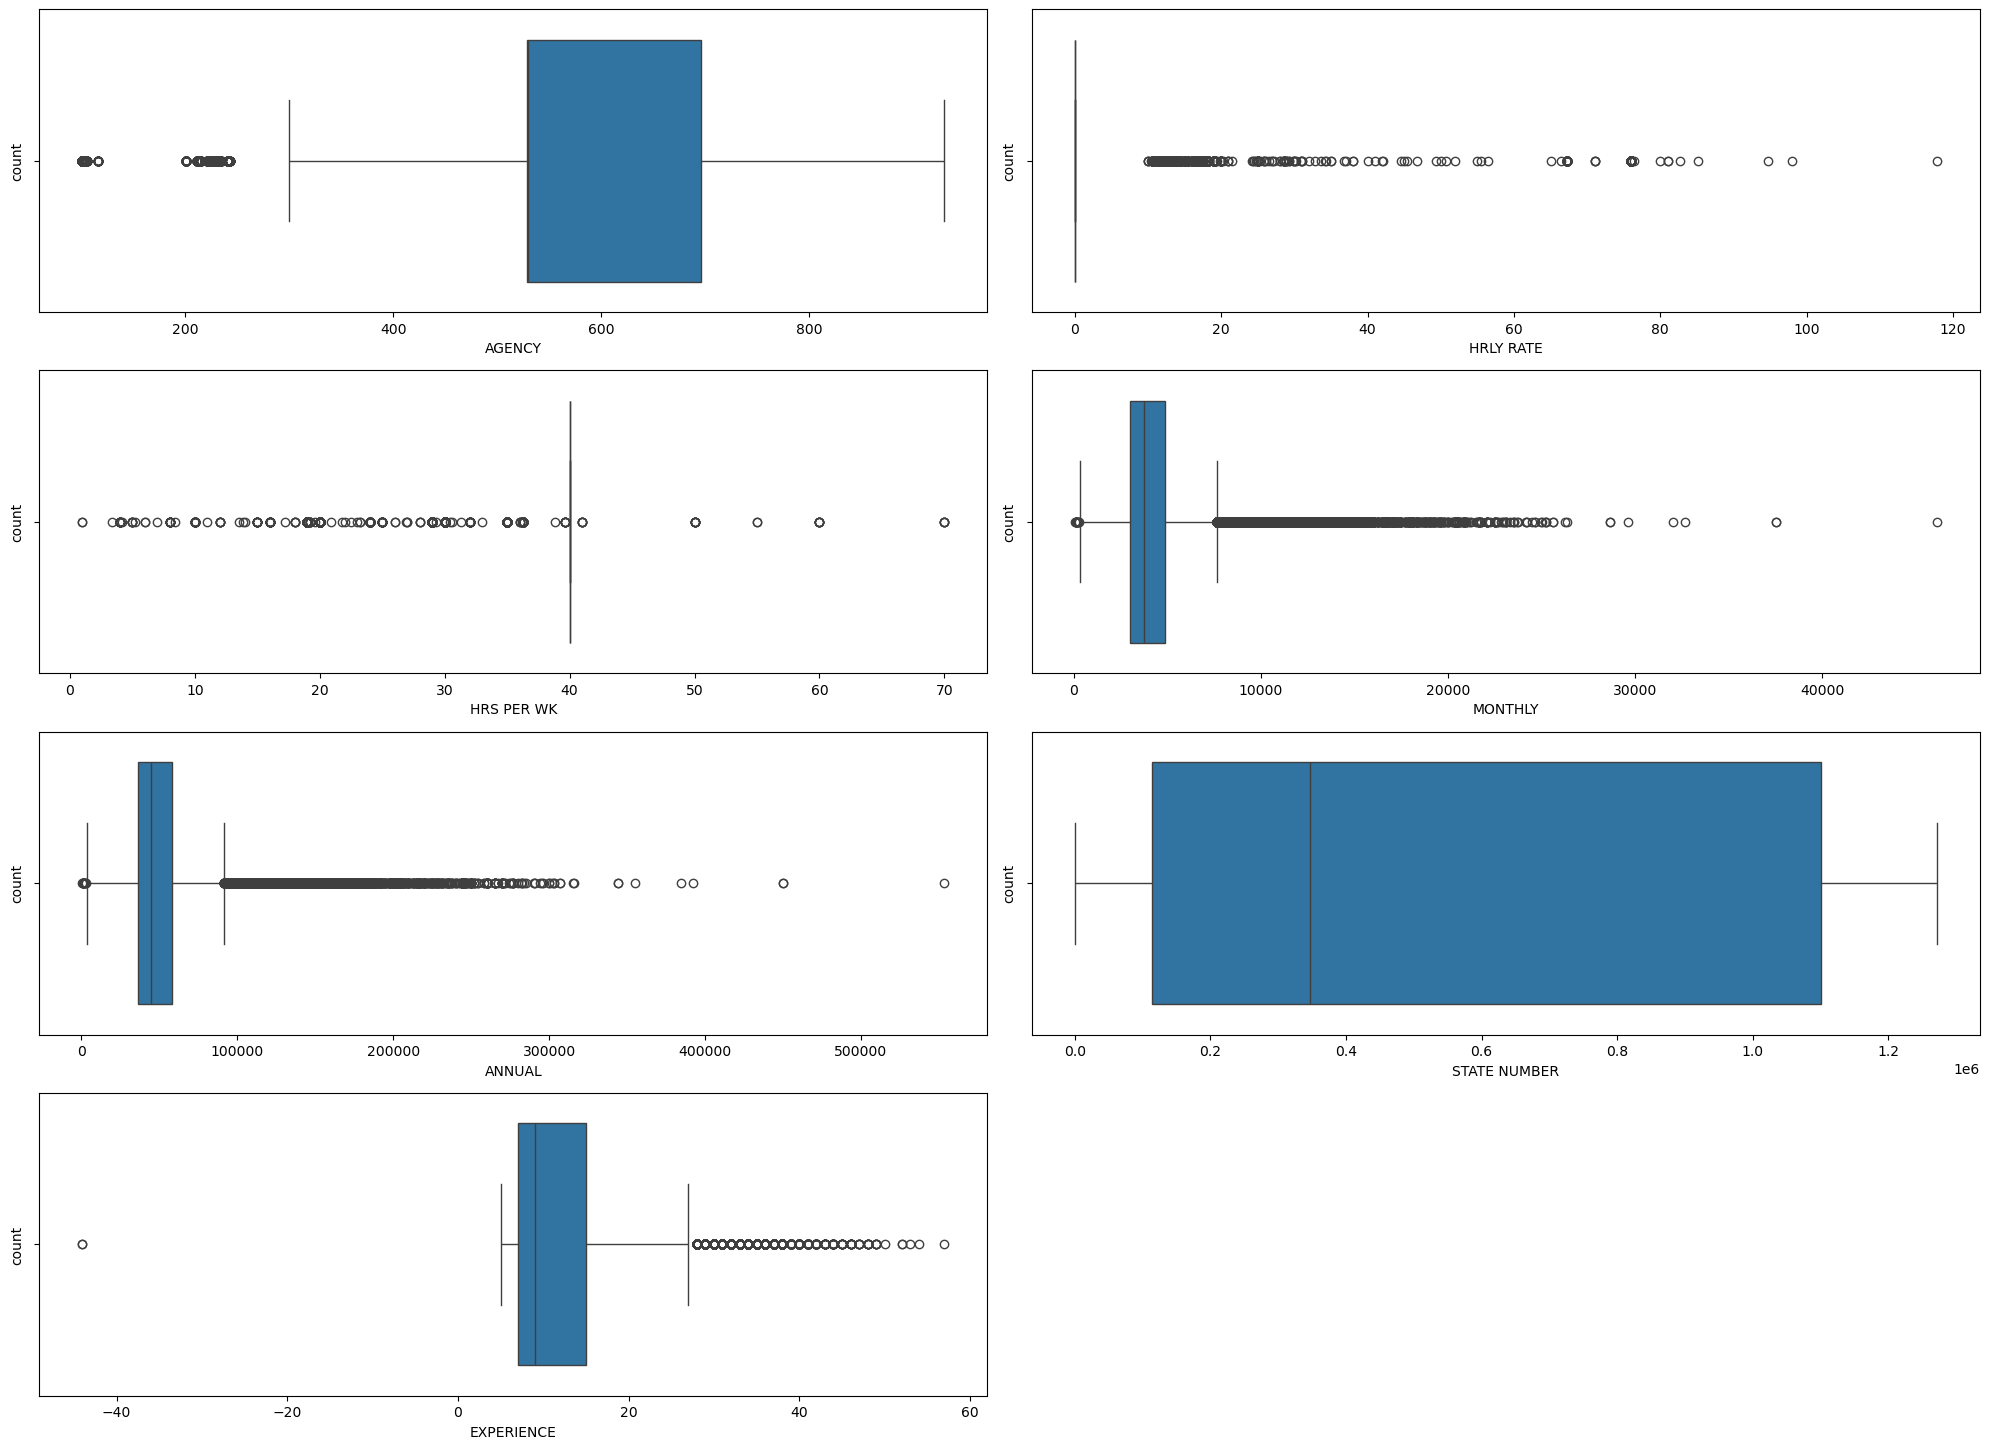

In [25]:
plt.figure(figsize=(20,25))
plotnumber=1
categorical_columns=['AGENCY NAME','CLASS CODE','CLASS TITLE','ETHNICITY','GENDER','STATUS']
for column in df.drop(categorical_columns,axis=1):
    if plotnumber<14:
        ax=plt.subplot(7,2,plotnumber)
        sns.boxplot(x=df[column])
        plt.xlabel(column,fontsize=10)
        plt.ylabel('count',fontsize=10)
        plotnumber+=1
        plt.tight_layout()

In [ ]:
# Handling outliers of Agency

Text(0.5, 1.0, 'BOXPLOT FOR AGENCY')

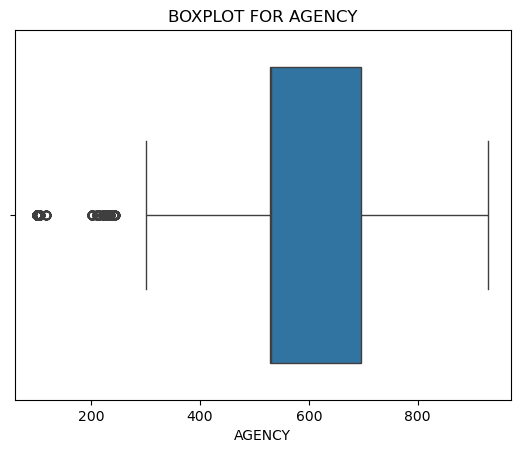

In [27]:
sns.boxplot(x=df.AGENCY)
plt.title('BOXPLOT FOR AGENCY')

In [29]:
df['AGENCY'].skew()

-0.6048740931591002

In [ ]:
# This is moderately negatively skewed ( left skewed)
# So we using IQR method

In [31]:
Q1=df['AGENCY'].quantile(.25)
Q1

529.0

In [33]:
Q3=df['AGENCY'].quantile(.75)
Q3

696.0

In [35]:
IQR=Q3-Q1
IQR

167.0

In [37]:
lower_bound=Q1-(1.5*IQR)
lower_bound

278.5

In [39]:
upper_bound=Q3+(1.5*IQR)
upper_bound

946.5

In [41]:
df.loc[df['AGENCY']<lower_bound]

,AGENCY,AGENCY NAME,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,EXPERIENCE
0,241,17,1409,711,5,1,8,75.96150,29.0,9545.82,114549.84,127717,37
1,212,48,578,560,5,1,4,81.04454,4.0,1404.77,16857.24,127717,10
2,241,17,1409,711,5,1,8,75.96150,29.0,9545.82,114549.84,59115,5
3,212,48,578,560,5,1,4,81.04453,4.0,1404.77,16857.24,59115,7
34,101,67,1068,765,5,0,7,0.00000,40.0,6500.00,78000.00,339273,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142639,116,77,1427,968,5,0,7,0.00000,40.0,3916.66,46999.92,1142412,6
142640,116,77,1442,1164,5,0,7,0.00000,40.0,9922.83,119073.96,142764,25
142641,116,77,1427,968,5,1,7,0.00000,40.0,3916.67,47000.04,1057964,5
142642,116,77,1336,386,2,0,7,0.00000,40.0,6883.33,82599.96,25703,8


In [43]:
len(df.loc[df['AGENCY']<lower_bound])/len(df)*100

2.4725550404399224

In [45]:
df.loc[df['AGENCY']<lower_bound,'AGENCY']=df['AGENCY'].median()

In [47]:
df.loc[df['AGENCY']>upper_bound]

,AGENCY,AGENCY NAME,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,EXPERIENCE


Text(0.5, 1.0, 'BOXPLOT FOR AGENCY')

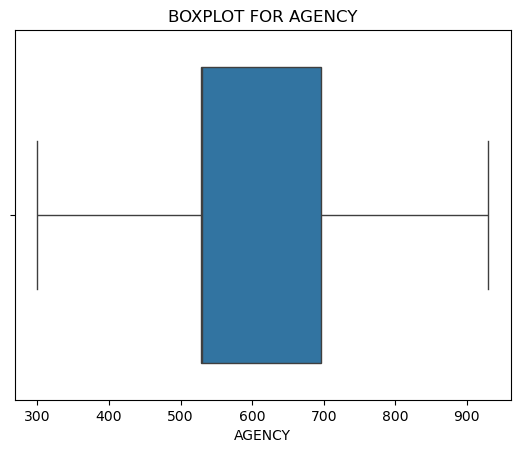

In [49]:
#Outliers handled.
sns.boxplot(x=df.AGENCY)
plt.title('BOXPLOT FOR AGENCY')

In [ ]:
# Handling outliers of Monthly

Text(0.5, 1.0, 'BOXPLOT FOR MOTHLY')

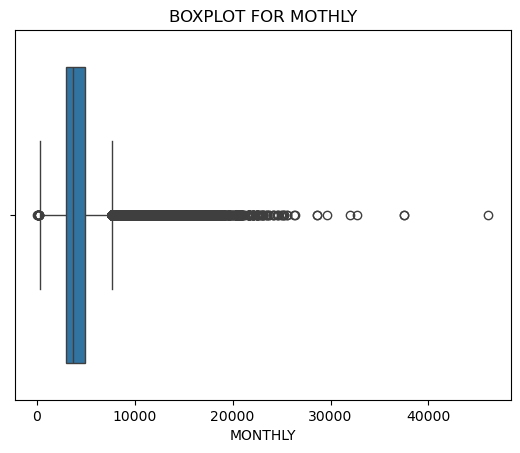

In [51]:
sns.boxplot(x=df.MONTHLY)
plt.title('BOXPLOT FOR MOTHLY')

In [53]:
df['MONTHLY'].skew()

2.7028045602110256

In [ ]:
# This is highly postively skewed (right skewed)
# So we are using IOR method

In [55]:
Q1=df['MONTHLY'].quantile(.25)
Q1

3019.84

In [57]:
Q3=df['MONTHLY'].quantile(.75)
Q3

4865.81

In [59]:
IQR=Q3-Q1
IQR

1845.9700000000003

In [61]:
lower_bound=Q1-(1.5*IQR)
lower_bound

250.88499999999976

In [63]:
upper_bound=Q3+(1.5*IQR)
upper_bound

7634.765000000001

In [65]:
df.loc[df['MONTHLY']<lower_bound]

,AGENCY,AGENCY NAME,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,EXPERIENCE
141394,530,67,1067,751,5,1,10,20.0,1.0,86.66,1039.92,176291,20
141415,530,67,1067,751,4,0,10,20.0,1.0,86.66,1039.92,1246122,6
141808,530,42,1074,442,3,1,8,0.0,10.0,100.00,1200.00,118315,8
141809,530,42,1074,442,5,0,8,0.0,10.0,200.00,2400.00,1164537,6
141897,530,42,1074,442,3,1,8,0.0,20.0,100.00,1200.00,338420,8
141901,530,42,1074,442,5,1,8,0.0,20.0,100.00,1200.00,931560,7
142033,530,42,1074,442,5,0,8,0.0,20.0,250.00,3000.00,1247654,5
142067,530,42,1074,442,2,1,8,0.0,10.0,50.00,600.00,851628,5
142114,530,42,1074,442,5,1,8,0.0,20.0,100.00,1200.00,336571,10
142205,530,42,1074,442,5,0,8,0.0,4.0,210.12,2521.44,775718,11


In [67]:
len(df.loc[df['MONTHLY']<lower_bound])/len(df)*100

0.008696757447434792

In [69]:
df.loc[df['MONTHLY']<lower_bound,'MONTHLY']=df['MONTHLY'].median()

In [71]:
df.loc[df['MONTHLY']>upper_bound]

,AGENCY,AGENCY NAME,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,EXPERIENCE
0,530,17,1409,711,5,1,8,75.9615,29.0,9545.82,114549.84,127717,37
2,530,17,1409,711,5,1,8,75.9615,29.0,9545.82,114549.84,59115,5
5,302,54,172,399,3,0,0,0.0000,40.0,12899.00,154788.00,1177785,5
7,510,82,172,399,5,1,0,0.0000,40.0,10000.00,120000.00,147334,5
36,530,67,1065,750,5,0,7,0.0000,40.0,8000.00,96000.00,49800,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149374,809,76,172,399,5,0,0,0.0000,40.0,10583.34,127000.08,336971,12
149393,809,76,165,856,3,1,0,0.0000,40.0,8358.41,100300.92,9905,21
149401,809,76,164,855,2,1,0,0.0000,40.0,7916.67,95000.04,38235,20
149415,809,76,171,398,5,0,0,0.0000,40.0,10188.09,122257.08,52817,17


In [73]:
len(df.loc[df['MONTHLY']>upper_bound])/len(df)*100

6.0328737431513035

In [ ]:
# Here percentage of outliers is greater than 5%. So we keep it as it is.

In [ ]:
# Handling outliers of Annual

Text(0.5, 1.0, 'BOXPLOT FOR ANNUAL')

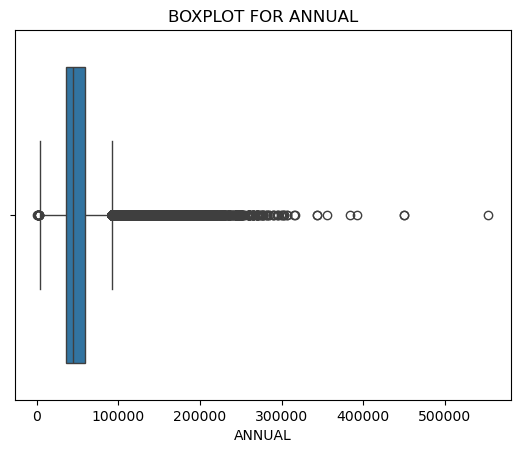

In [75]:
sns.boxplot(x=df.ANNUAL)
plt.title('BOXPLOT FOR ANNUAL')

In [77]:
df['ANNUAL'].skew()

2.7028045602110278

In [ ]:
# This is highly positively skewed (right skewed)
# So we are using IQR method

In [79]:
Q1=df['ANNUAL'].quantile(.25)
Q1

36238.08

In [81]:
Q3=df['ANNUAL'].quantile(.75)
Q3

58389.72

In [83]:
IQR=Q3-Q1
IQR

22151.64

In [85]:
lower_bound=Q1-(1.5*IQR)
lower_bound

3010.6200000000026

In [87]:
upper_bound=Q3+(1.5*IQR)
upper_bound

91617.18

In [89]:
df.loc[df['ANNUAL']<lower_bound]

,AGENCY,AGENCY NAME,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,EXPERIENCE
141394,530,67,1067,751,5,1,10,20.0,1.0,3720.17,1039.92,176291,20
141415,530,67,1067,751,4,0,10,20.0,1.0,3720.17,1039.92,1246122,6
141808,530,42,1074,442,3,1,8,0.0,10.0,3720.17,1200.00,118315,8
141809,530,42,1074,442,5,0,8,0.0,10.0,3720.17,2400.00,1164537,6
141897,530,42,1074,442,3,1,8,0.0,20.0,3720.17,1200.00,338420,8
141901,530,42,1074,442,5,1,8,0.0,20.0,3720.17,1200.00,931560,7
142033,530,42,1074,442,5,0,8,0.0,20.0,3720.17,3000.00,1247654,5
142067,530,42,1074,442,2,1,8,0.0,10.0,3720.17,600.00,851628,5
142114,530,42,1074,442,5,1,8,0.0,20.0,3720.17,1200.00,336571,10
142205,530,42,1074,442,5,0,8,0.0,4.0,3720.17,2521.44,775718,11


In [91]:
len(df.loc[df['ANNUAL']<lower_bound])/len(df)*100

0.008696757447434792

In [93]:
df.loc[df['ANNUAL']<lower_bound,'ANNUAL']=df['ANNUAL'].median()

In [95]:
df.loc[df['ANNUAL']>upper_bound]

,AGENCY,AGENCY NAME,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,EXPERIENCE
0,530,17,1409,711,5,1,8,75.9615,29.0,9545.82,114549.84,127717,37
2,530,17,1409,711,5,1,8,75.9615,29.0,9545.82,114549.84,59115,5
5,302,54,172,399,3,0,0,0.0000,40.0,12899.00,154788.00,1177785,5
7,510,82,172,399,5,1,0,0.0000,40.0,10000.00,120000.00,147334,5
36,530,67,1065,750,5,0,7,0.0000,40.0,8000.00,96000.00,49800,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149374,809,76,172,399,5,0,0,0.0000,40.0,10583.34,127000.08,336971,12
149393,809,76,165,856,3,1,0,0.0000,40.0,8358.41,100300.92,9905,21
149401,809,76,164,855,2,1,0,0.0000,40.0,7916.67,95000.04,38235,20
149415,809,76,171,398,5,0,0,0.0000,40.0,10188.09,122257.08,52817,17


In [97]:
len(df.loc[df['ANNUAL']>upper_bound])/len(df)*100

6.0328737431513035

In [ ]:
# Here percentage of outliers is greater than 5%. So keep it as it is

In [ ]:
# Handling outliers of Experience

Text(0.5, 1.0, 'BOXPLOT FOR EXPERIENCE')

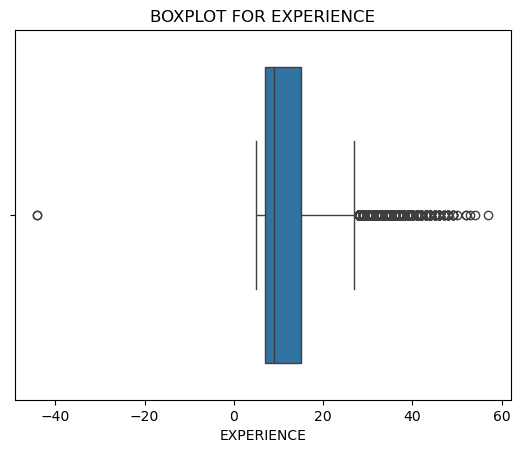

In [99]:
sns.boxplot(x=df.EXPERIENCE)
plt.title('BOXPLOT FOR EXPERIENCE')

In [101]:
df['EXPERIENCE'].skew()

1.4890701576724883

In [ ]:
# This is highly positively skewed (right skewed)
# So we are using IQR method

In [103]:
Q1=df['EXPERIENCE'].quantile(.25)
Q1

7.0

In [105]:
Q3=df['EXPERIENCE'].quantile(.75)
Q3

15.0

In [107]:
IQR=Q3-Q1
IQR

8.0

In [109]:
lower_bound=Q1-(1.5*IQR)
lower_bound

-5.0

In [111]:
upper_bound=Q3+(1.5*IQR)
upper_bound

27.0

In [113]:
df.loc[df['EXPERIENCE']<lower_bound]

,AGENCY,AGENCY NAME,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,EXPERIENCE
116978,696,88,827,77,5,1,0,0.0,40.0,4033.74,48404.88,68427,-44
141891,530,42,1073,441,5,1,7,0.0,40.0,600.00,7200.00,116511,-44


In [115]:
len(df.loc[df['EXPERIENCE']<lower_bound])/len(df)*100

0.0013379626842207372

In [117]:
df.loc[df['EXPERIENCE']<lower_bound,'EXPERIENCE']=df['EXPERIENCE'].median()

In [119]:
df.loc[df['EXPERIENCE']>upper_bound]

,AGENCY,AGENCY NAME,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,EXPERIENCE
0,530,17,1409,711,5,1,8,75.9615,29.0,9545.82,114549.84,127717,37
151,530,100,683,859,5,1,7,0.0000,40.0,8356.20,100274.40,48614,29
152,530,100,38,488,5,1,7,0.0000,40.0,14985.50,179826.00,131851,43
168,530,100,678,668,3,0,7,0.0000,40.0,3226.40,38716.80,94179,39
180,530,100,523,572,5,1,7,0.0000,40.0,4730.37,56764.44,85225,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149345,809,76,166,858,5,0,0,0.0000,40.0,9141.71,109700.52,7719,37
149348,809,76,125,327,3,0,0,0.0000,40.0,3380.58,40566.96,187857,29
149359,809,76,171,398,5,0,0,0.0000,40.0,10734.72,128816.64,185386,34
149471,809,76,1095,315,5,1,0,0.0000,40.0,4171.28,50055.36,2146,28


In [121]:
len(df.loc[df['EXPERIENCE']>upper_bound])/len(df)*100

3.777068657555141

In [123]:
df.loc[df['EXPERIENCE']>upper_bound,'EXPERIENCE']=df['EXPERIENCE'].median()

Text(0.5, 1.0, 'BOXPLOT FOR EXPERIENCE')

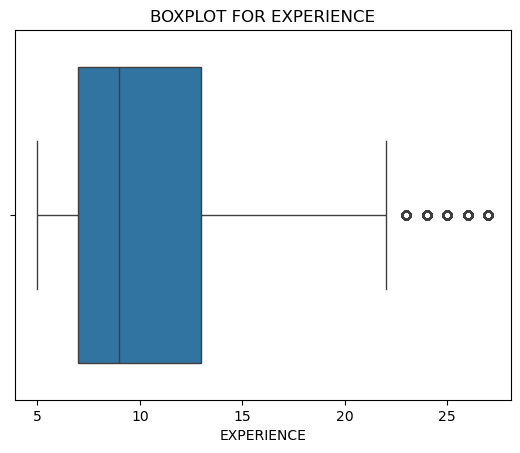

In [125]:
# Outliers handled
sns.boxplot(x=df.EXPERIENCE)
plt.title('BOXPLOT FOR EXPERIENCE')

In [ ]:
# The target column (ANNUAL) mathematically derived from hourly rate and monthly columns. 
# If we keep these columns it will cause data leakage
# So to avoid data leakage we are dropping these columns.

In [127]:
df.drop(['HRLY RATE','MONTHLY'],axis=1,inplace=True)

In [129]:
df

,AGENCY,AGENCY NAME,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,HRS PER WK,ANNUAL,STATE NUMBER,EXPERIENCE
0,530,17,1409,711,5,1,8,29.0,114549.84,127717,9
1,530,48,578,560,5,1,4,4.0,16857.24,127717,10
2,530,17,1409,711,5,1,8,29.0,114549.84,59115,5
3,530,48,578,560,5,1,4,4.0,16857.24,59115,7
4,696,88,773,292,3,0,0,40.0,39411.24,165030,5
...,...,...,...,...,...,...,...,...,...,...,...
149476,809,76,1021,1198,5,1,0,40.0,34788.00,770781,8
149477,809,76,493,1404,5,0,0,40.0,66000.00,847431,10
149478,809,76,102,324,5,1,1,20.0,13447.20,34266,13
149479,809,76,148,1007,5,1,0,40.0,68929.92,123490,9


In [ ]:
# Scaling

In [131]:
from sklearn.preprocessing import RobustScaler

# Select numeric columns
numerical_columns = ['HRS PER WK', 'EXPERIENCE']

# Extract the data
x_numerical = df[numerical_columns]

# Initialize and fit-transform
scaler = RobustScaler()
x_scaled = scaler.fit_transform(x_numerical)

# Convert back to DataFrame
x_scaled = pd.DataFrame(x_scaled, columns=numerical_columns)

# Replace the original values in df
df[numerical_columns] = x_scaled

In [133]:
df

,AGENCY,AGENCY NAME,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,HRS PER WK,ANNUAL,STATE NUMBER,EXPERIENCE
0,530,17,1409,711,5,1,8,-11.0,114549.84,127717,0.000000
1,530,48,578,560,5,1,4,-36.0,16857.24,127717,0.166667
2,530,17,1409,711,5,1,8,-11.0,114549.84,59115,-0.666667
3,530,48,578,560,5,1,4,-36.0,16857.24,59115,-0.333333
4,696,88,773,292,3,0,0,0.0,39411.24,165030,-0.666667
...,...,...,...,...,...,...,...,...,...,...,...
149476,809,76,1021,1198,5,1,0,0.0,34788.00,770781,-0.166667
149477,809,76,493,1404,5,0,0,0.0,66000.00,847431,0.166667
149478,809,76,102,324,5,1,1,-20.0,13447.20,34266,0.666667
149479,809,76,148,1007,5,1,0,0.0,68929.92,123490,0.000000


# 5. Feature Selection

In [ ]:
# Checking correlation

In [135]:
df.corr()

,AGENCY,AGENCY NAME,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,HRS PER WK,ANNUAL,STATE NUMBER,EXPERIENCE
AGENCY,1.000000,0.457766,0.168228,-0.209337,-0.000605,0.116151,0.030125,-0.067605,-0.210767,0.057702,-0.004967
AGENCY NAME,0.457766,1.000000,-0.070193,-0.150526,0.030906,0.190787,-0.009776,-0.012687,-0.085846,0.021148,0.039933
CLASS CODE,0.168228,-0.070193,1.000000,0.098652,-0.062253,0.078706,0.230336,-0.074418,-0.158476,0.076236,-0.049022
CLASS TITLE,-0.209337,-0.150526,0.098652,1.000000,0.044255,0.060309,0.009949,0.011968,0.085712,-0.092181,0.073777
ETHNICITY,-0.000605,0.030906,-0.062253,0.044255,1.000000,0.106739,0.090649,-0.023782,0.170204,-0.074631,0.072255
GENDER,0.116151,0.190787,0.078706,0.060309,0.106739,1.000000,0.033160,0.001952,0.129321,-0.003143,0.056429
STATUS,0.030125,-0.009776,0.230336,0.009949,0.090649,0.033160,1.000000,-0.306624,0.184973,-0.007632,0.007327
HRS PER WK,-0.067605,-0.012687,-0.074418,0.011968,-0.023782,0.001952,-0.306624,1.000000,0.094330,-0.010072,0.033225
ANNUAL,-0.210767,-0.085846,-0.158476,0.085712,0.170204,0.129321,0.184973,0.094330,1.000000,-0.265426,0.239918
STATE NUMBER,0.057702,0.021148,0.076236,-0.092181,-0.074631,-0.003143,-0.007632,-0.010072,-0.265426,1.000000,-0.623910


Text(0.5, 1.0, 'Correlation Heatmap')

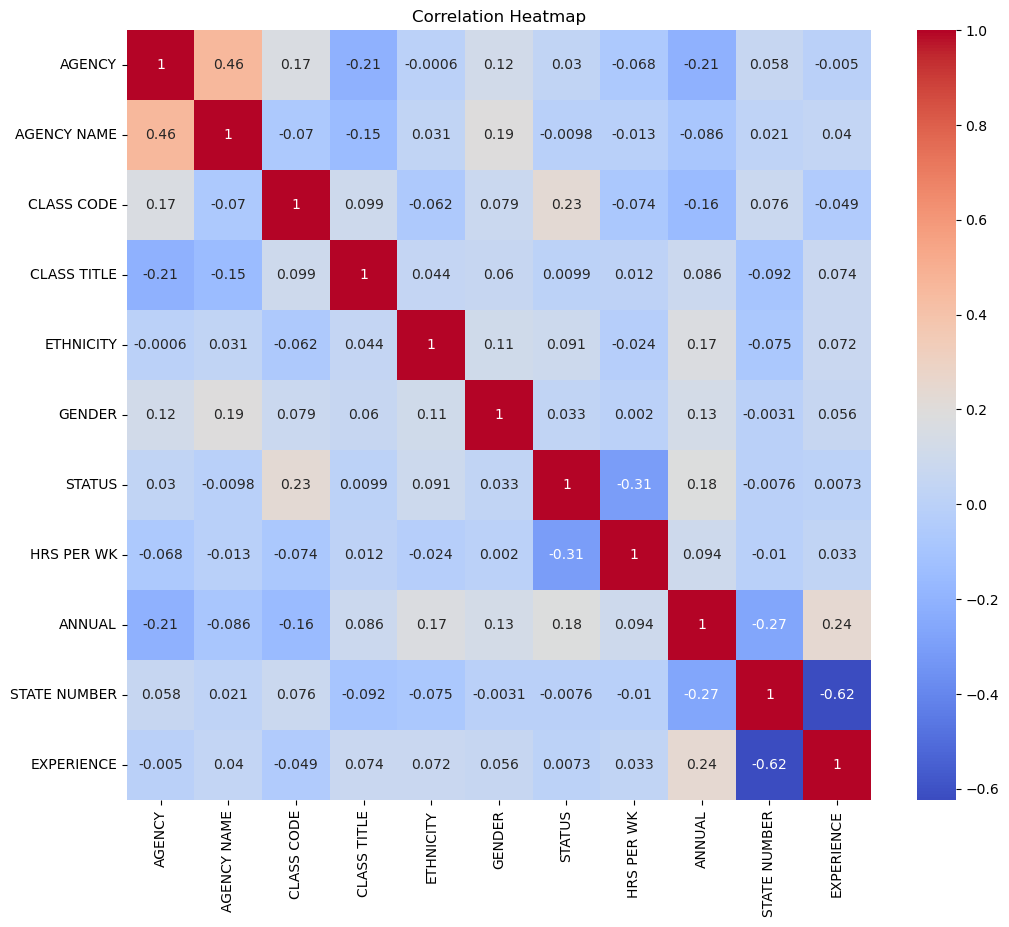

In [137]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')

## Insights:

**1. Experience and State Number**
* Correlation: -0.62
* Insights:

  As the State Number increases, Experience tends to decrease. This might suggest that employees in higher-numbered states are generally less     experienced.

**2. Annual Salary and Experience**
* Correlation: +0.24
* Insights:

  More experienced employees tend to earn higher salaries. This is a weak to moderate positive correlation, which aligns with typical salary structures.

**3. Annual Salary and State Number**
* Correlation: -0.27
* Insights:

  Employees in higher-numbered states seem to earn slightly less on average.

**4. Annual Salary and Other Variables**
* Correlation with:
      * Gender: +0.17
      * Ethnicity: +0.086
      * HRS PER WK: +0.094
* Insights:

  Slight relationships with gender and working hours - not strong enough to draw firm conclusions, but worth exploring further with models or visualizations.

**5. Strong Internal Categorical Relations**
* Agency and Agency Name: +0.46

  These are likely duplicate or highly related columns. One of them can probably be dropped to avoid redundancy.
* Class Code and Status: +0.23

  Indicates certain job class codes tend to be associated with specific employment statuses.
**6. Low or Negligible Correlations**
* Variables like Ethnicity, Gender, Class Title show very low correlations (close to 0) with most other variables, including Annual Salary.
 

In [139]:
# Dropping Agency Name to avoid redundancy
df.drop('AGENCY NAME',axis=1,inplace=True)

# 6. Model Creation

In [141]:
# Creating dependent and independent features
x = df.drop(columns='ANNUAL')  
y = df['ANNUAL']  

In [143]:
from sklearn.model_selection import train_test_split

In [145]:
# Splitting the data fro testing and training
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Linear Regression

In [147]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [149]:
y_predict=LR.predict(x_test)
y_predict

array([35563.42610476, 51933.86031371, 65021.2870867 , ...,
       66195.71205491, 39130.12860017, 44043.85488792])

In [151]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [153]:
MSE=mean_squared_error(y_test,y_predict)
MSE

495079979.6500947

In [155]:
RMSE=np.sqrt(MSE)
RMSE

22250.392797658533

In [157]:
MAE=mean_absolute_error(y_test,y_predict)
MAE

14491.805918416328

In [159]:
r2_score=r2_score(y_test,y_predict)
r2_score

0.2290209834481023

In [161]:
n=x_test.shape[0]
p=x_test.shape[1]

In [163]:
adjusted_r2=1-(1-r2_score)*(n-1)/(n-p-1)
adjusted_r2

0.22878881524289718

### K Nearest Neighbors (KNN)

In [165]:
from sklearn.neighbors import KNeighborsRegressor

In [167]:
rmse_val=[]
for i in range(1,11):
    model=KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred_i=model.predict(x_test)
    error=np.sqrt(mean_squared_error(y_test,y_pred_i))
    rmse_val.append(error)
    print('RMSE value for k = ',i,'is :',error)

RMSE value for k =  1 is : 24463.439590070266
RMSE value for k =  2 is : 22668.184616206097
RMSE value for k =  3 is : 22031.86469718414
RMSE value for k =  4 is : 21772.19511254396
RMSE value for k =  5 is : 21712.7759094714
RMSE value for k =  6 is : 21694.037556472947
RMSE value for k =  7 is : 21663.810105076045
RMSE value for k =  8 is : 21666.030555385663
RMSE value for k =  9 is : 21704.120046240772
RMSE value for k =  10 is : 21725.021813267584


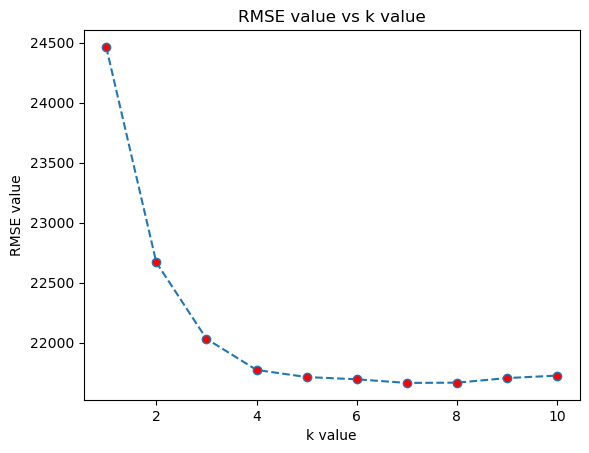

In [169]:
plt.plot(range(1,11),rmse_val,linestyle='dashed',marker='o',markerfacecolor='red')
plt.title('RMSE value vs k value')
plt.xlabel('k value')
plt.ylabel('RMSE value')
plt.show()

In [171]:
KNN=KNeighborsRegressor(n_neighbors=5)
KNN.fit(x_train,y_train)

KNeighborsRegressor()

In [173]:
y_predict=KNN.predict(x_test)
y_predict

array([23453.736, 36310.92 , 70139.904, ..., 95915.52 , 42549.72 ,
       43140.   ])

In [175]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [177]:
MSE=mean_squared_error(y_test,y_predict)
MSE

471444637.69492155

In [179]:
RMSE=np.sqrt(MSE)
RMSE

21712.7759094714

In [181]:
MAE=mean_absolute_error(y_test,y_predict)
MAE

12439.443754490418

In [183]:
r2_score=r2_score(y_test,y_predict)
r2_score

0.26582787010376163

In [185]:
n=x_test.shape[0]
p=x_test.shape[1]

In [187]:
adjusted_r2=1-(1-r2_score)*(n-1)/(n-p-1)
adjusted_r2

0.26560678571358975

### Decision Tree

In [189]:
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor()
DT.fit(x_train,y_train)

DecisionTreeRegressor()

In [191]:
y_predict=DT.predict(x_test)
y_predict

array([23748.36, 36310.92, 98962.2 , ..., 39981.48, 44642.04, 30414.24])

In [193]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [195]:
MSE=mean_squared_error(y_test,y_predict)
MSE

65507185.09662765

In [197]:
RMSE=np.sqrt(MSE)
RMSE

8093.6509126986475

In [199]:
MAE=mean_absolute_error(y_test,y_predict)
MAE

3501.3413319062383

In [201]:
r2_score=r2_score(y_test,y_predict)
r2_score

0.8979868562276018

In [203]:
n=x_test.shape[0]
p=x_test.shape[1]

In [205]:
adjusted_r2=1-(1-r2_score)*(n-1)/(n-p-1)
adjusted_r2

0.8979561365737739

## Random Forest

In [207]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

RandomForestRegressor()

In [209]:
y_predict=RFR.predict(x_test)
y_predict

array([23262.2304    , 36310.91999169, 92257.4388    , ...,
       40436.8152    , 44642.04      , 29951.5008    ])

In [211]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [213]:
MSE=mean_squared_error(y_test,y_predict)
MSE

43811682.39536939

In [215]:
RMSE=np.sqrt(MSE)
RMSE

6619.039386147312

In [217]:
MAE=mean_absolute_error(y_test,y_predict)
MAE

2863.332692183447

In [219]:
r2_score=r2_score(y_test,y_predict)
r2_score

0.9317728666173514

In [221]:
n=x_test.shape[0]
p=x_test.shape[1]

In [223]:
adjusted_r2=1-(1-r2_score)*(n-1)/(n-p-1)
adjusted_r2

0.9317523210891805

### Gradient Boosting

In [225]:
from sklearn.ensemble import GradientBoostingRegressor
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)

GradientBoostingRegressor()

In [227]:
y_predict=GBR.predict(x_test)
y_predict

array([27357.1862266 , 42131.55882116, 83991.60232814, ...,
       49539.12769912, 43452.41903588, 47767.07235361])

In [229]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [231]:
MSE=mean_squared_error(y_test,y_predict)
MSE

174406960.4410365

In [233]:
RMSE=np.sqrt(MSE)
RMSE

13206.32274484599

In [235]:
MAE=mean_absolute_error(y_test,y_predict)
MAE

7369.841296346954

In [237]:
r2_score=r2_score(y_test,y_predict)
r2_score

0.7283992236250987

In [239]:
n=x_test.shape[0]
p=x_test.shape[1]

In [241]:
adjusted_r2=1-(1-r2_score)*(n-1)/(n-p-1)
adjusted_r2

0.7283174353229147

### XG Boost

In [243]:
!pip install xgboost

In [245]:
from xgboost import XGBRegressor
XGB=XGBRegressor()
XGB.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [247]:
y_predict=XGB.predict(x_test)
y_predict

array([23944.781, 35955.637, 88713.98 , ..., 43221.17 , 44097.69 ,
       33696.51 ], dtype=float32)

In [249]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [251]:
MSE=mean_squared_error(y_test,y_predict)
MSE

70167522.67425606

In [253]:
RMSE=np.sqrt(MSE)
RMSE

8376.60567737649

In [255]:
MAE=mean_absolute_error(y_test,y_predict)
MAE

4004.6382531338963

In [257]:
r2_score=r2_score(y_test,y_predict)
r2_score

0.8907293975742763

In [259]:
n=x_test.shape[0]
p=x_test.shape[1]

In [261]:
adjusted_r2=1-(1-r2_score)*(n-1)/(n-p-1)
adjusted_r2

0.8906964924509172

# Model Comparison Report
 Among all tested models:
* Random Forest performed the best in terms of r2 score

  r2 score= 0.9317728666173514


  Adjusted r2 score= 0.9317523210891805

  Both are very close, meaning the model fits the data well without unnecessary complexity.

  The tiny difference means adding the features helpes to improve the model without overfitting.

  This is a strong and reliable model performance.

* Decision Tree and XG Boost are the second best models.

* Decision Tree model  have the following percentage:


   r2 score =0.8979868562276018


  Adjusted r2 score = 0.8979561365737739

* XG Boost model gave the following percentage:

   r2 score = 0.8907293975742763


  adjusted r2 score = 0.8906964924509172

* Gradient Boosting model gave the following percentage:

   r2 score = 0.7283992236250987


  adjustedr2 score = 0.7283174353229147

* Linear Regession and K Nearest Neighbors(KNN) are the underperformed modeles for this given data set.

# Challenges Faced:
* One person with multiple records.
* Salary information is derived from multiple columns in the dataset.
* SVM was not used because the data set is huge in number of records.
* The last five columns almost 99% of data are missing. Keeping it may introduce noise or errors.